In [1]:
import numpy as np
import pandas as pd
import weightedstats as ws
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Estimates of Location

In [2]:
state = pd.read_csv('./src/state.csv')

In [3]:
#Mean
np.mean(state["Population"])

6162876.3

In [4]:
#Trimmed Mean
stats.trim_mean(state["Population"].values, 0.1)

4783697.125

In [5]:
#Median
np.median(state["Population"])

4436369.5

In [6]:
#Weighted Mean
np.average(state["Murder.Rate"], weights=state["Population"])

4.445833981123393

In [7]:
#Weighted Median
ws.weighted_median(state["Murder.Rate"], weights=state["Population"])

4.4

### Estimates of Variability

In [8]:
#Standard Deviation

#Using Numpy
(np.std(state["Population"]), 

#Using Pandas
state["Population"].std())

(6779407.114632265, 6848235.347401142)

###### You will see that Standard Deviation using numpy and pandas are different  because Pandas uses the unbiased estimator (N-1 in the denominator), whereas Numpy by default does not.

In [9]:
#Inter Quarter Range (IQR)

#Using Scipy
(stats.iqr(state["Population"]),

#Using Numpy
np.subtract(*np.percentile(state["Population"], [75, 25])))

(4847308.0, 4847308.0)

In [10]:
#Median Absolute Deviation 
stats.median_absolute_deviation(state["Population"])

3849870.3852

In [11]:
#Table 1-4 Various percentile for Murder Rates
np.percentile(state["Murder.Rate"], [5, 25, 50, 75, 95])

array([1.6  , 2.425, 4.   , 5.55 , 6.51 ])

### Exploring the Data Distribution

Text(0, 0.5, 'Population (in Millions)')

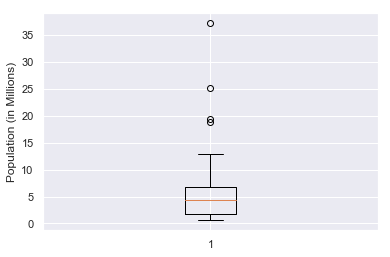

In [12]:
#Figure 1-2. Boxplot of state population

#Box Plot using matplotlib
plt.boxplot(state["Population"]/1000000)
plt.ylabel("Population (in Millions)")

In [13]:
#Table 1-5: Frequencey Table
bins= np.linspace(min(state["Population"]), max(state["Population"]), 11)
groups = pd.cut(state["Population"], bins=bins)
groups.value_counts()

(563626.0, 4232659.0]       23
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64

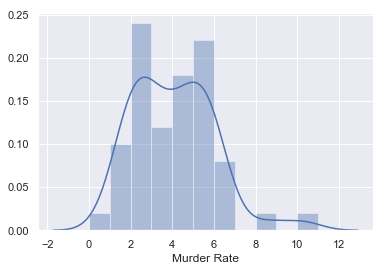

In [14]:
#Figure 1-3: Histogram
sns.distplot(state["Murder.Rate"], 
             hist=True, 
             kde=True, 
             bins=range(12), 
             axlabel="Murder Rate"
            )

### Exploring Binary and Categorical Data

Text(0.5, 1.0, 'Airline delays at DFW by cause')

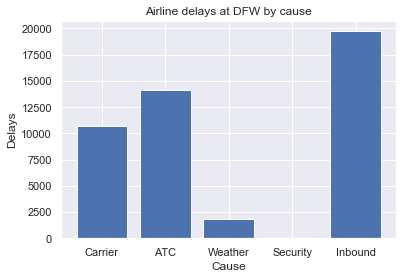

In [15]:
dfw = pd.read_csv("./src/dfw_airline.csv")

#Figure 1-5: Bar plot airline delays at DFW by cause
plt.bar(dfw.columns, dfw.iloc[0]/6)
plt.xlabel("Cause")
plt.ylabel("Delays")
plt.title("Airline delays at DFW by cause")

### Correlation

In [16]:
sp500_px = pd.read_csv('./src/sp500_px.csv')
sp500_sym = pd.read_csv('./src/sp500_sym.csv')

In [17]:
sp500_px.head()

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


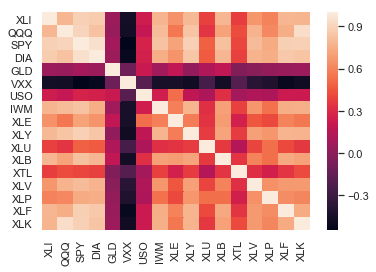

In [18]:
#Figure 1-6: Correlation between ETFs return
etfs = sp500_px[sp500_sym.loc[sp500_sym['sector'] == 'etf', 'symbol']].loc[sp500_px[sp500_px.columns[0]] > "2012-07-01"]
sns.heatmap(etfs.corr())

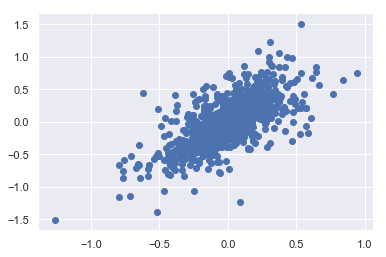

In [19]:
# Figure 1-7: Scatterplot between returns for ATT and Verizon
telecom = sp500_px[sp500_sym.loc[sp500_sym['sector'] == 'telecommunications_services', 'symbol']].loc[sp500_px[sp500_px.columns[0]] > "2012-07-01"]
plt.scatter(telecom["T"], telecom["VZ"])

### Exploring Two or More Variables

In [20]:
kc_tax= pd.read_csv("./src/kc_tax.csv")

In [21]:
kc_tax0 = kc_tax.loc[(kc_tax["TaxAssessedValue"] < 750000) & (kc_tax["SqFtTotLiving"] > 100) & (kc_tax["SqFtTotLiving"] < 3500)]

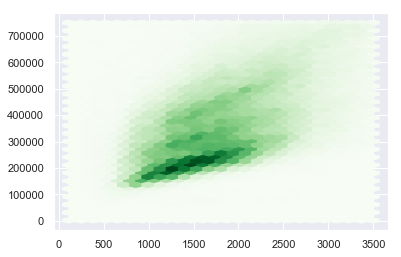

In [22]:
plt.hexbin(kc_tax0["SqFtTotLiving"], kc_tax0["TaxAssessedValue"], gridsize=(25,25), cmap=plt.cm.Greens)

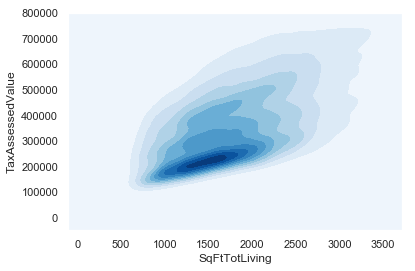

In [23]:
sns.kdeplot(kc_tax0["SqFtTotLiving"], kc_tax0["TaxAssessedValue"], cmap="Blues", shade=True, shade_lowest=True)

In [24]:
lc_loans= pd.read_csv("./src/lc_loans.csv")

In [25]:
pd.crosstab(lc_loans["grade"], lc_loans["status"], margins=True)

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
0.2,146,661,216,63,1086
0.4,96,524,138,42,800
0.6,63,360,101,45,569
0.8,51,228,100,32,411
1.0,53,217,88,17,375
1.2,400,2598,686,161,3845
1.4,333,1875,576,140,2924
1.6,302,1748,448,134,2632
1.8,267,1309,347,91,2014


In [26]:
airline_stats = pd.read_csv("./src/airline_stats.csv")

[(0, 50)]

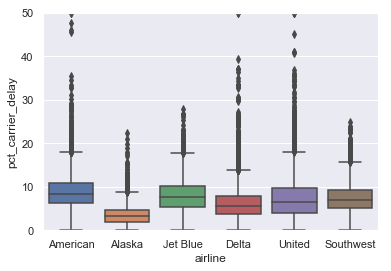

In [28]:
sns.boxplot(x="airline", y="pct_carrier_delay", data=airline_stats).set(ylim=(0, 50))

[(0, 50)]

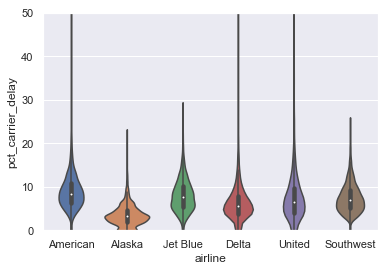

In [29]:
sns.violinplot(x="airline", y="pct_carrier_delay", data=airline_stats).set(ylim=(0, 50))

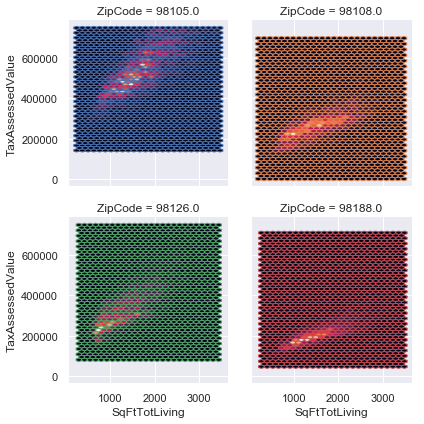

In [30]:
data = kc_tax0.loc[kc_tax0["ZipCode"].isin([98188, 98105, 98108, 98126])]
g = sns.FacetGrid(data, hue="ZipCode", col="ZipCode", col_wrap=2)
g.map(plt.hexbin, "SqFtTotLiving", "TaxAssessedValue", gridsize=(25,25))